# Credit Risk Assessment ML Prediction

## Objective:
To develop a machine learning model that accurately predicts credit risk by analyzing customer-related features, thereby enabling financial institutions to make informed decisions about loan approvals and mitigate potential risks.

## Goal:
* Build a predictive system using machine learning techniques to classify customers as low-risk or high-risk based on historical credit data.
* Identify significant factors that influence credit risk, providing insights for better risk management strategies.
* Evaluate and compare the performance of multiple machine learning models to select the most accurate and efficient approach.
* Deploy the model for practical use, ensuring scalability and reliability in real-world financial decision-making scenarios.

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, classification_report, roc_curve, auc
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import joblib
import warnings
warnings.filterwarnings("ignore")

## Data Loading

In [224]:
df = pd.read_csv('credit_risk_dataset.csv')

In [225]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [226]:
df.shape

(32581, 12)

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


## Data Preparation:

* Handling missing values using the median.
* Encoding categorical variables using LabelEncoder.
* Splitting the dataset into training and testing sets.
* Standardizing features using StandardScaler.
* Modeling and Prediction

### Dropping less relevant columns

In [230]:
df = df.drop(columns = ['cb_person_default_on_file', 'cb_person_cred_hist_length'])

In [231]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55


In [232]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000


### Handling missing values

In [234]:
df.isnull().sum()

person_age                  0
person_income               0
person_home_ownership       0
person_emp_length         895
loan_intent                 0
loan_grade                  0
loan_amnt                   0
loan_int_rate            3116
loan_status                 0
loan_percent_income         0
dtype: int64

In [235]:
df = df.fillna({
    col: df[col].median() if df[col].dtype != 'O' else df[col].mode()[0]
    for col in df.columns
})
print('Missing Value Handeled')

Missing Value Handeled


In [236]:
df.isnull().sum()

person_age               0
person_income            0
person_home_ownership    0
person_emp_length        0
loan_intent              0
loan_grade               0
loan_amnt                0
loan_int_rate            0
loan_status              0
loan_percent_income      0
dtype: int64

### Encoding categorical variables using LabelEncoder

<b> Why Use LabelEncoder?
* LabelEncoder converts categorical data (string labels) into numerical values (integers). It is particularly useful for machine learning models that require numerical input.

In [238]:
label_encoders = {}

for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    # Print the mapping for this column
    print(f"Encoding for column '{col}':")
    for category, label in zip(le.classes_, range(len(le.classes_))):
        print(f"  {category} -> {label}")

Encoding for column 'person_home_ownership':
  MORTGAGE -> 0
  OTHER -> 1
  OWN -> 2
  RENT -> 3
Encoding for column 'loan_intent':
  DEBTCONSOLIDATION -> 0
  EDUCATION -> 1
  HOMEIMPROVEMENT -> 2
  MEDICAL -> 3
  PERSONAL -> 4
  VENTURE -> 5
Encoding for column 'loan_grade':
  A -> 0
  B -> 1
  C -> 2
  D -> 3
  E -> 4
  F -> 5
  G -> 6


In [239]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55


### Splitting the dataset into training and testing sets

In [241]:
X = df.drop(columns = ['loan_status'])
y = df['loan_status']

In [242]:
y

0        1
1        0
2        1
3        1
4        1
        ..
32576    0
32577    0
32578    1
32579    0
32580    0
Name: loan_status, Length: 32581, dtype: int64

In [243]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42 )

In [244]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income
32377,64,46000,3,2.0,4,2,4800,11.09,0.10
1338,26,26000,2,0.0,0,4,8500,16.45,0.33
7047,23,51000,0,3.0,4,2,16000,13.11,0.31
8225,22,56004,0,6.0,3,0,6000,7.88,0.11
7178,24,79000,3,3.0,4,2,7000,12.54,0.09


## EDA with Visualisation

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   person_age             32581 non-null  int64  
 1   person_income          32581 non-null  int64  
 2   person_home_ownership  32581 non-null  int64  
 3   person_emp_length      32581 non-null  float64
 4   loan_intent            32581 non-null  int64  
 5   loan_grade             32581 non-null  int64  
 6   loan_amnt              32581 non-null  int64  
 7   loan_int_rate          32581 non-null  float64
 8   loan_status            32581 non-null  int64  
 9   loan_percent_income    32581 non-null  float64
dtypes: float64(3), int64(7)
memory usage: 2.5 MB


### Visualizing Numerical Features

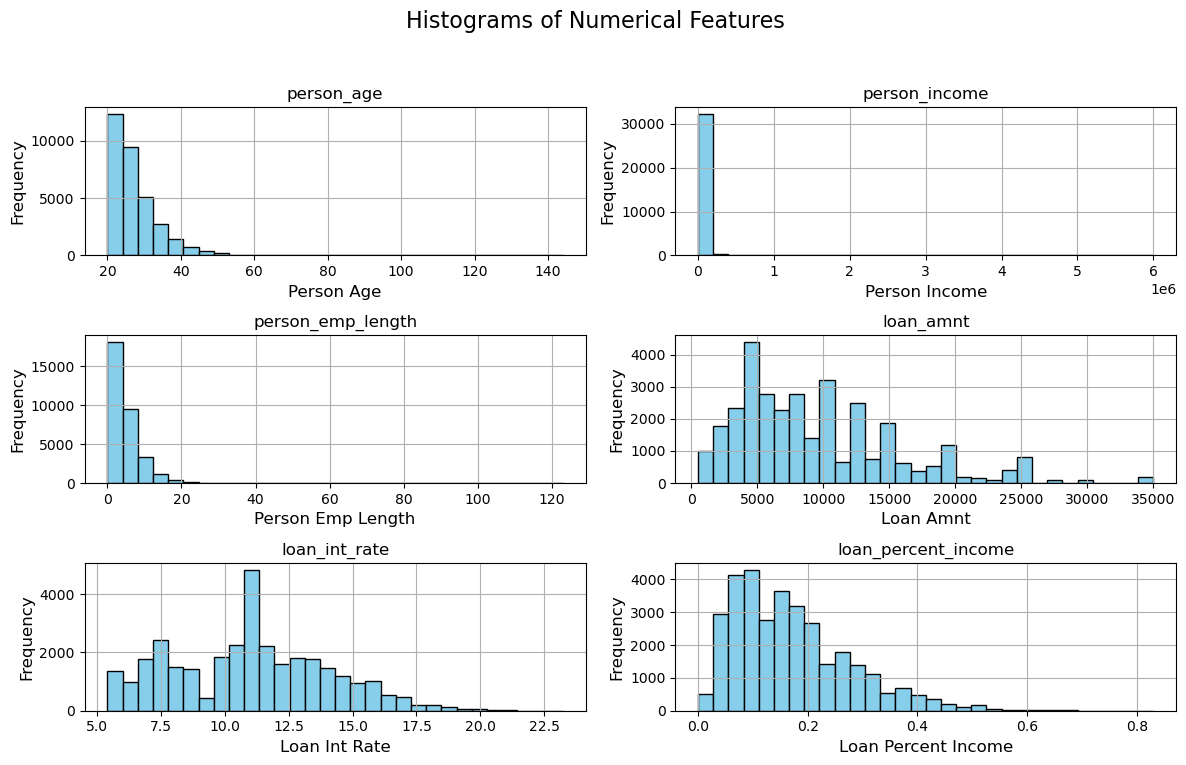

In [248]:
# Plot histograms for selected numerical features
numerical_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income']
df[numerical_features].hist(bins=30, figsize=(12, 8), color='skyblue', edgecolor='black')

# Add a super title for the entire figure
plt.suptitle("Histograms of Numerical Features", size=16)

# Loop through each axis to add labels
for ax, feature in zip(plt.gcf().axes, numerical_features):
    ax.set_xlabel(feature.replace('_', ' ').title(), fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)

# Show the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


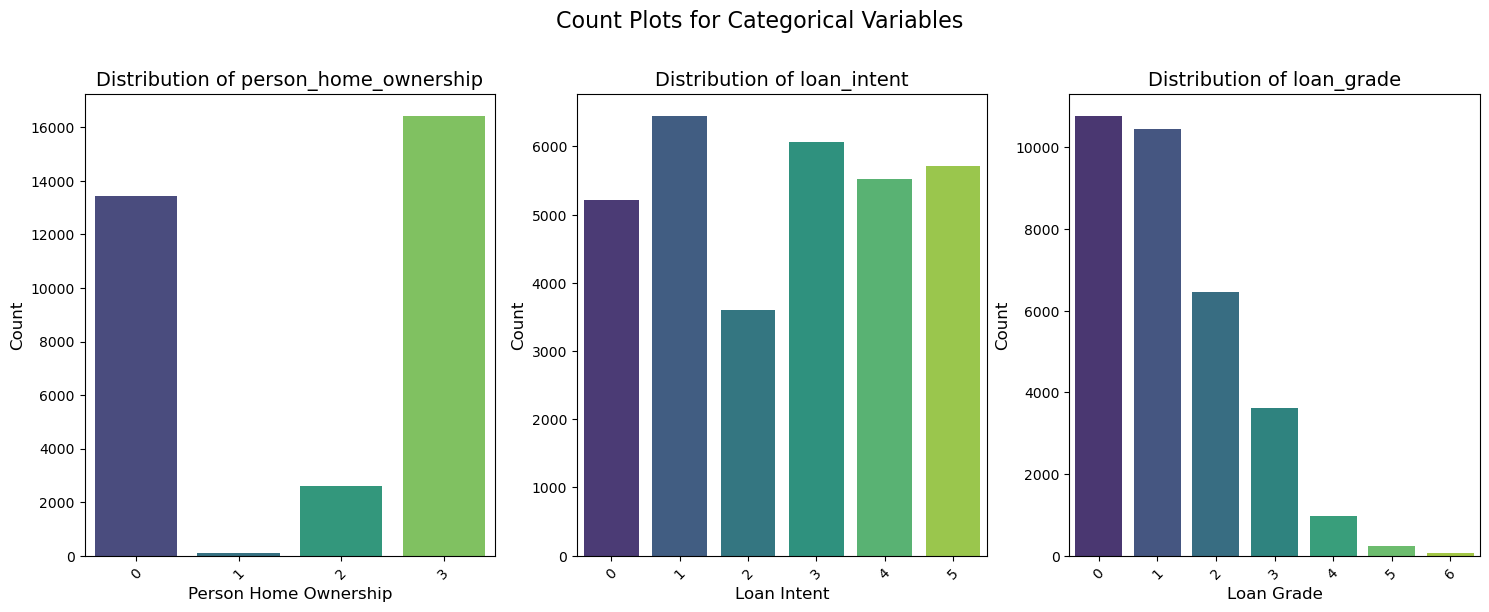

In [249]:
# Categorical columns
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade']

# Create subplots
fig, axes = plt.subplots(1, len(categorical_cols), figsize=(18, 6), constrained_layout=False)

# Plot each categorical column
for ax, col in zip(axes, categorical_cols):
    sns.countplot(x=col, data=df, palette='viridis', ax=ax)
    ax.set_title(f'Distribution of {col}', size=14)
    ax.set_xlabel(col.replace('_', ' ').title(), fontsize=12)  # X-axis label
    ax.set_ylabel('Count', fontsize=12)  # Y-axis label
    ax.tick_params(axis='x', rotation=45)  # Rotate X-axis labels for readability

# Display the plot
plt.suptitle("Count Plots for Categorical Variables", size=16, y=1.02)
plt.show()


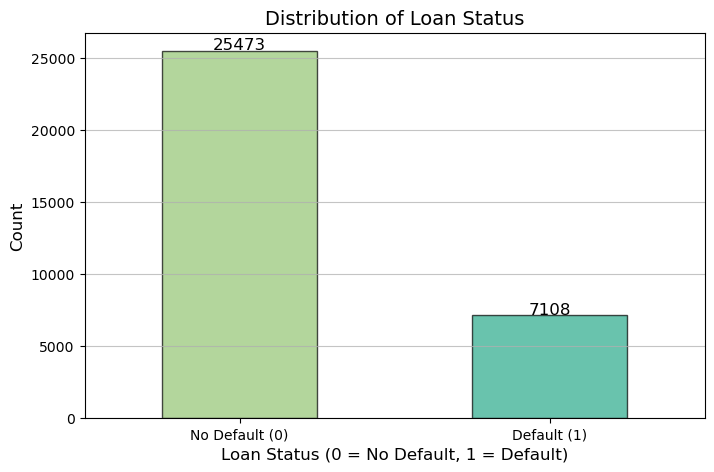

In [250]:
# Bar plot for loan_status
plt.figure(figsize=(8, 5))
df['loan_status'].value_counts().sort_index().plot(
    kind='bar', 
    color=['#93C572', '#2AAA8A'],  # Custom colors
    alpha=0.7, 
    edgecolor='k'
)

# Add title and labels
plt.title('Distribution of Loan Status', fontsize=14)
plt.xlabel('Loan Status (0 = No Default, 1 = Default)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add grid lines
plt.grid(axis='y', alpha=0.75)

# Customize x-axis ticks
plt.xticks([0, 1], ['No Default (0)', 'Default (1)'], rotation=0)

# Annotate the bars
for bar in plt.gca().patches:
    plt.gca().text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height() + 100, 
        f'{int(bar.get_height())}', 
        ha='center', fontsize=12, color='black'
    )

# Save the plot
plt.savefig("distribution_loan_status.png", format='png', dpi=300, transparent=True, bbox_inches="tight")

# Display the plot
plt.show()




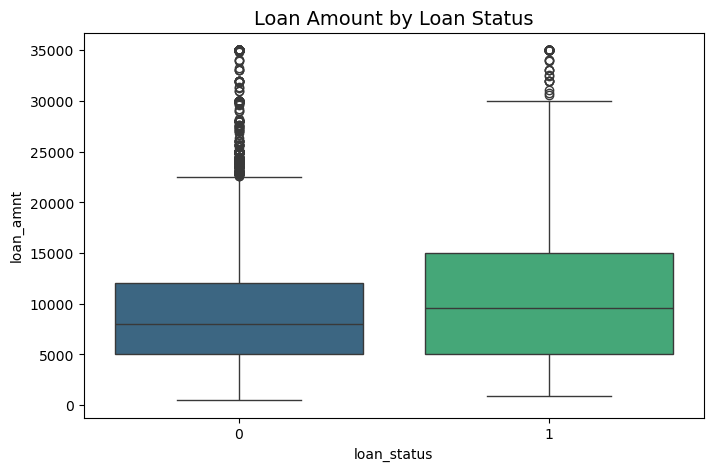

In [251]:
# Boxplot for loan amount by loan status
plt.figure(figsize=(8, 5))
sns.boxplot(x='loan_status', y='loan_amnt', data=df, palette='viridis')
plt.title('Loan Amount by Loan Status', size=14)
plt.show()


### Multivariate Analysis - Correlation Heatmap

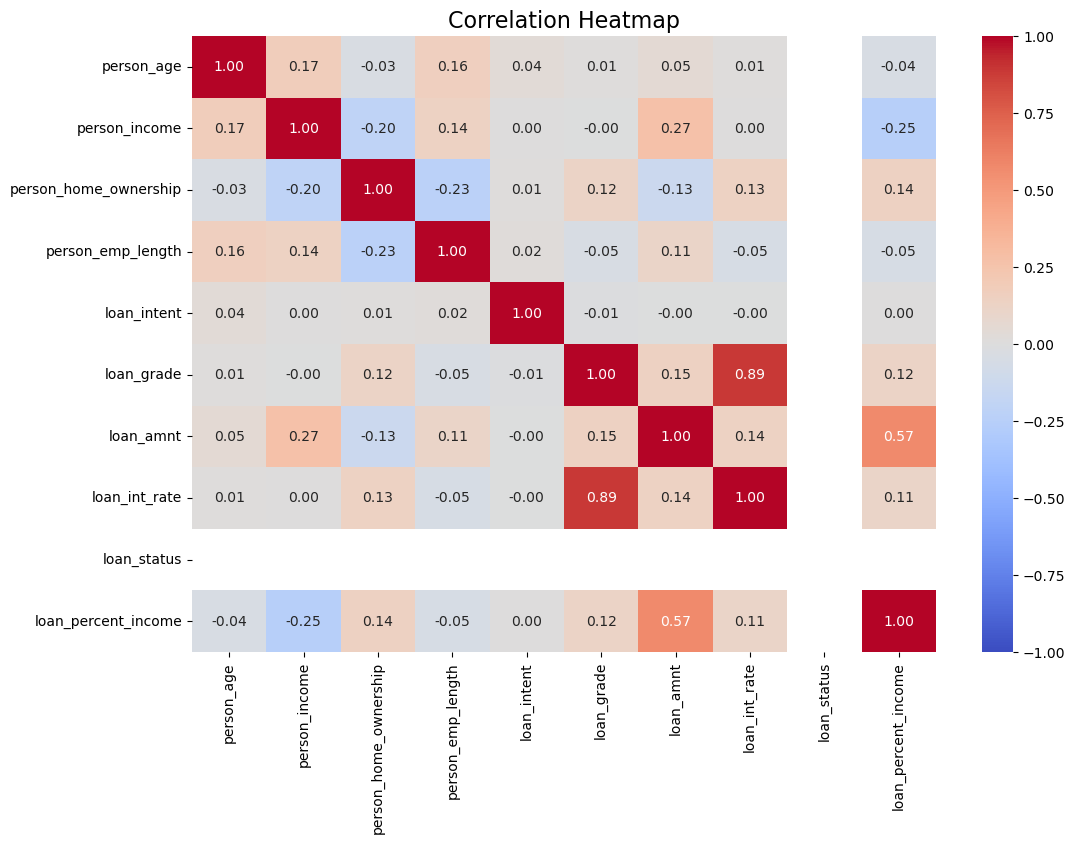

In [253]:
# Ensure the columns are numeric, convert categorical columns to numeric if needed
# Assuming 'loan_status' is a categorical column
df['loan_status'] = df['loan_status'].map({'No Default (0)': 0, 'Default (1)': 1})

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap', size=16)
plt.show()


## Model Building and Prediction

In [280]:
# List of models to be evaluated
models = [
    GaussianNB(),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(n_estimators=100, random_state=42),
    LogisticRegression(random_state=50, max_iter=1000),
    AdaBoostClassifier(random_state=45),
    XGBClassifier(random_state=42),
    LGBMClassifier(boosting_type='gbdt', bagging_fraction=0.9, learning_rate=0.05, feature_fraction=0.9, bagging_freq=50, verbosity=-1, verbose=50),
    KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
    GradientBoostingClassifier(random_state=42)
]

# Loop through each model and evaluate performance on training and test data
for i, model in enumerate(models):
    model.fit(X_train, y_train)  # Train the model

    # Get predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)

    # Display results
    print("-----------------")
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print("-----------------")
    print()

-----------------
Model 1: GaussianNB
Training Accuracy: 0.8188
Testing Accuracy: 0.8154
-----------------

-----------------
Model 2: DecisionTreeClassifier
Training Accuracy: 1.0000
Testing Accuracy: 0.8898
-----------------

-----------------
Model 3: RandomForestClassifier
Training Accuracy: 1.0000
Testing Accuracy: 0.9306
-----------------

-----------------
Model 4: LogisticRegression
Training Accuracy: 0.8367
Testing Accuracy: 0.8275
-----------------

-----------------
Model 5: AdaBoostClassifier
Training Accuracy: 0.8878
Testing Accuracy: 0.8860
-----------------

-----------------
Model 6: XGBClassifier
Training Accuracy: 0.9575
Testing Accuracy: 0.9346
-----------------

-----------------
Model 7: LGBMClassifier
Training Accuracy: 0.9373
Testing Accuracy: 0.9326
-----------------

-----------------
Model 8: KNeighborsClassifier
Training Accuracy: 0.8787
Testing Accuracy: 0.8320
-----------------

-----------------
Model 9: GradientBoostingClassifier
Training Accuracy: 0.9274

<b>Cross-Validation </b>: To avoid overfitting and get more reliable results, use cross-validation (e.g., cross_val_score or StratifiedKFold) instead of just a single train-test split

In [285]:
from sklearn.model_selection import cross_val_score

for i, model in enumerate(models):
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print("-----------------")
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Cross-Validation Mean Accuracy: {cv_scores.mean():.4f}")
    print("-----------------")
    print()


-----------------
Model 1: GaussianNB
Cross-Validation Mean Accuracy: 0.8189
-----------------

-----------------
Model 2: DecisionTreeClassifier
Cross-Validation Mean Accuracy: 0.8878
-----------------

-----------------
Model 3: RandomForestClassifier
Cross-Validation Mean Accuracy: 0.9324
-----------------

-----------------
Model 4: LogisticRegression
Cross-Validation Mean Accuracy: 0.8368
-----------------

-----------------
Model 5: AdaBoostClassifier
Cross-Validation Mean Accuracy: 0.8865
-----------------

-----------------
Model 6: XGBClassifier
Cross-Validation Mean Accuracy: 0.9357
-----------------

-----------------
Model 7: LGBMClassifier
Cross-Validation Mean Accuracy: 0.9344
-----------------

-----------------
Model 8: KNeighborsClassifier
Cross-Validation Mean Accuracy: 0.8349
-----------------

-----------------
Model 9: GradientBoostingClassifier
Cross-Validation Mean Accuracy: 0.9244
-----------------



### Ensemble Learning for Better Performance:

* Ensemble learning combines multiple models to reduce the risk of overfitting and improve generalization. By combining the strengths of various models, the ensemble approach tends to perform better than individual models.
* In this case, we are using a Voting Classifier, which is a simple and effective way to combine multiple base models and improve predictive performance.

<b>Ensemble Estimators: A list of various classifiers is created, such as Naive Bayes, Decision Tree, Random Forest, Logistic Regression, AdaBoost, XGBoost, LightGBM, KNN, and Gradient Boosting.

<b>Voting Classifier: A VotingClassifier is instantiated with soft voting, meaning it combines the predicted probabilities from each model and selects the class with the highest average probability.

<b>Fitting the Model: The voting_clf.fit() method trains the ensemble model on the training data (X_train, y_train).

<b> Predictions & Accuracy: After training, predictions are made on both the training and test datasets. The accuracy is calculated using accuracy_score().

<b> Results: Finally, the training and test accuracies of the ensemble model are printed.



In [288]:
# List of models to be evaluated
ensemble_estimators = [
    ('naive_bayes', GaussianNB()),
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('logistic_reg', LogisticRegression(random_state=50, max_iter=1000)),
    ('adaboost', AdaBoostClassifier(random_state=45)),
    ('xgboost', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')),
    ('lightgbm', LGBMClassifier(boosting_type='gbdt', bagging_fraction=0.9, learning_rate=0.05, 
                                feature_fraction=0.9, bagging_freq=50, verbosity=-1)),
    ('knn', KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)),
    ('gradient_boost', GradientBoostingClassifier(random_state=42))
]

# Voting Classifier (Soft Voting)
voting_clf = VotingClassifier(estimators=ensemble_estimators, voting='soft')

# Fit the ensemble model
voting_clf.fit(X_train, y_train)

# Make predictions
ensemble_train_accuracy = accuracy_score(y_train, voting_clf.predict(X_train))
ensemble_test_accuracy = accuracy_score(y_test, voting_clf.predict(X_test))

# Print the results
print("------------ Ensemble Model ------------")
print(f"Ensemble Model (Voting Classifier)")
print(f"Training Accuracy: {ensemble_train_accuracy:.4f}")
print(f"Testing Accuracy: {ensemble_test_accuracy:.4f}")
print("----------------------------------------")

------------ Ensemble Model ------------
Ensemble Model (Voting Classifier)
Training Accuracy: 0.9532
Testing Accuracy: 0.9328
----------------------------------------


In [296]:
# Predict on the test data
y_pred = voting_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("------------- Ensemble Model Evaluation -------------")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

------------- Ensemble Model Evaluation -------------
Accuracy: 0.9328

Confusion Matrix:
[[5045   27]
 [ 411 1034]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      5072
           1       0.97      0.72      0.83      1445

    accuracy                           0.93      6517
   macro avg       0.95      0.86      0.89      6517
weighted avg       0.94      0.93      0.93      6517



### Feature Importance in VotingClassifier
The VotingClassifier combines different models, so we need to access the feature importance of the base estimators within the ensemble.

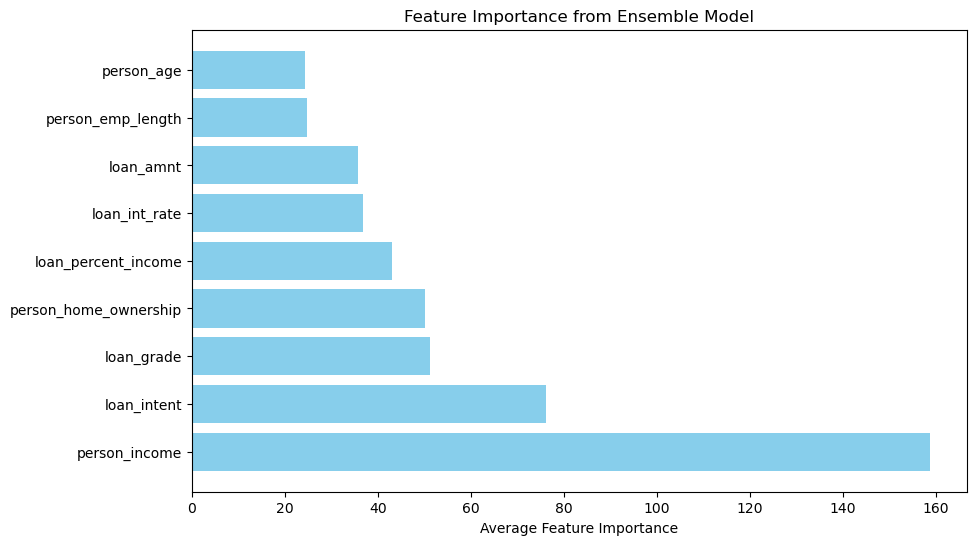

In [345]:
# Initialize a dictionary to store feature importances from each model
feature_importances = {}

# Loop through each base model in the VotingClassifier
for name, model in voting_clf.named_estimators_.items():
    if hasattr(model, 'feature_importances_'):  # Check if model has feature importance
        feature_importances[name] = model.feature_importances_

# If the model doesn't have feature_importances_, we can skip it or add a custom importance for non-tree-based models
# For example, LogisticRegression or KNN does not have feature importances directly, but we can use coefficients or other methods.

# Now, if we want to average feature importances from models that have them
if feature_importances:
    # Create an average importance across models with feature importances
    avg_importance = np.mean(list(feature_importances.values()), axis=0)

    # Sort the importances and display them
    sorted_idx = np.argsort(avg_importance)[::-1]  # Sort in descending order
    feature_names = X_train.columns  # Assuming X_train is your feature DataFrame
    
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names[sorted_idx], avg_importance[sorted_idx], color='skyblue')
    plt.xlabel('Average Feature Importance')
    plt.title('Feature Importance from Ensemble Model')
    plt.show()
else:
    print("No feature importances available for this ensemble model.")

### Visualize the confusion matrix

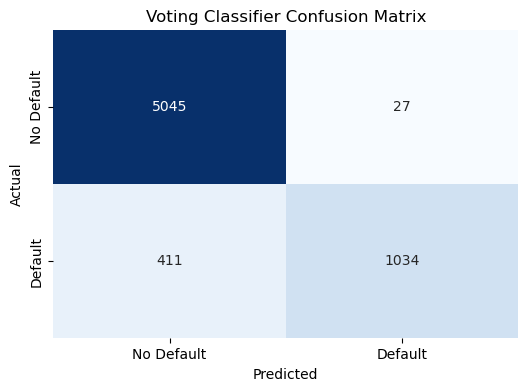

In [301]:
# visualize the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Voting Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Receiver Operating Characteristic (ROC) Curve for Ensamble Model

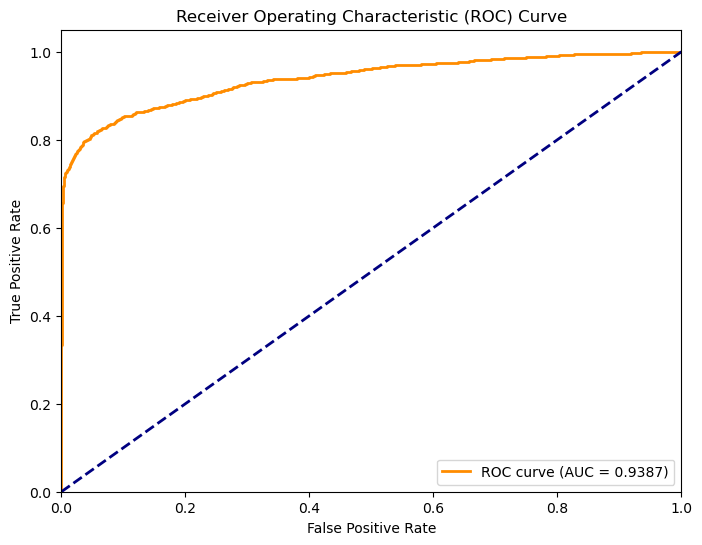

In [303]:
# Predict probabilities for the test set (for ROC curve)
y_prob = voting_clf.predict_proba(X_test)[:, 1]  # Probability of the positive class (Default = 1)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Model Evaluation Summary and ROC Analysis
### 1. Model Performance Metrics

<b>Accuracy:

* The model achieved an accuracy of 93.28%, indicating that it correctly classified approximately 93% of the test instances. This is a strong performance, suggesting that the model is reliable for predicting loan default status.
Confusion Matrix:

<b>The confusion matrix shows:

* True Negatives (TN): 5045 cases where the model correctly predicted 'No Default' (class 0).
* True Positives (TP): 1034 cases where the model correctly predicted 'Default' (class 1).
* False Negatives (FN): 411 cases where the model incorrectly predicted 'No Default' when the actual class was 'Default'.
* False Positives (FP): 27 cases where the model incorrectly predicted 'Default' when the actual class was 'No Default'.

<b>Classification Report:

<b>Class 0 (No Default):

* Precision: 0.92 — Of all instances predicted as 'No Default', 92% were correct.
* Recall: 0.99 — Of all actual 'No Default' instances, 99% were correctly identified.
* F1-Score: 0.96 — The balance between precision and recall for 'No Default' is high.

<b> Class 1 (Default):

* Precision: 0.97 — Of all instances predicted as 'Default', 97% were correct.
* Recall: 0.72 — Of all actual 'Default' instances, 72% were correctly identified.
* F1-Score: 0.83 — The balance between precision and recall for 'Default' is also strong, but recall could be improved.
* The macro average (average of precision, recall, and F1 across both classes) indicates that the model performs well across both classes, with an overall F1 score of 0.89.

* The weighted average is 0.93, which takes the class distribution into account, showing that the model performs well even when the class imbalance is considered.

### 2. ROC Curve and AUC Analysis

The ROC curve represents the model's ability to distinguish between the positive class (Default) and the negative class (No Default).
In this case, the AUC (Area Under the Curve) score is typically expected to be a number between 0 and 1:
AUC Value: A higher AUC value (closer to 1) indicates a better model performance. If the AUC value is above 0.9, it generally suggests that the model has excellent discriminative ability.
The ROC curve typically plots the True Positive Rate (TPR) vs. the False Positive Rate (FPR) at various threshold values. A curve that is closer to the top-left corner indicates better performance.
The AUC score quantifies this. An AUC score above 0.8 usually indicates a good model, and if the score is closer to 1, it means that the model is highly capable of distinguishing between the classes.

### 3. Final Summary and Insights

<b>Model Strengths:

* High Accuracy: The ensemble model provides high accuracy (93.28%), meaning it's performing well in classifying the loan status correctly.
* Class Imbalance Handling: The model handles the class imbalance quite well. While 'Default' (class 1) has fewer samples, the model performs reasonably well for both classes, with an F1-score of 0.83 for class 1.
* Precision and Recall: The precision for both classes is strong, particularly for 'Default'. However, the recall for 'Default' could be improved, as some instances of default (411) are misclassified as non-default.

<b> In conclusion, the model is performing very well overall, with strong accuracy and F1-scores, and the ROC curve supports its ability to distinguish between the two classes.

### Save the trained model to a file

In [309]:
joblib.dump(voting_clf, 'voting_classifier_model.joblib')


### Using Model with sample data

In [331]:
new_data = pd.DataFrame({
    'person_age': [28, 45],  # Age of the person
    'person_income': [40000, 70000],  # Income of the person
    'person_home_ownership': [1, 0],  # Home ownership (1 = own, 0 = rent)
    'person_emp_length': [3.0, 10.0],  # Employment length (in years, float)
    'loan_intent': [1, 0],  # Loan intent (1 = personal, 0 = other)
    'loan_grade': [2, 4],  # Loan grade (numeric encoding of the loan grade)
    'loan_amnt': [12000, 20000],  # Loan amount
    'loan_int_rate': [0.05, 0.04],  # Loan interest rate
    'loan_percent_income': [0.3, 0.25],  # Percentage of income spent on loan
})

In [333]:
# Load the model
model = joblib.load('voting_classifier_model.joblib')

# Make predictions
predictions = model.predict(new_data)

# Output the result
print("Predictions:", predictions)

Predictions: [0 1]


df.info()

<b> The predictions [0 1] from the model indicate that for the two data samples, the model predicts the following:

<b>The first sample is predicted to not default (label 0).
<b>The second sample is predicted to default (label 1).

<b> Explanation:
* 0: This represents the "No Default" category, meaning the model predicts that the loan applicant is less likely to default on the loan.
* 1: This represents the "Default" category, meaning the model predicts that the loan applicant is likely to default on the loan.

### Thank You!